In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('experiments/0004_UResNet_small_BC')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0006_ResNet3D_18_K400_augmentation')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0008_ResNet3D_18_K400_withaugmentation_BC_1ch')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0015_ResNet3D_18_K400_BC_1ch_federated_crossval_aug')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0024_ResNet3D_18_K400_BC_1ch_Centralized_2centerMNM')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0026_ResNet3D_18_K400_BC_1ch_Centralized_ConcatenateEDES')
# exp_path = Path().absolute().parent.parent.joinpath('experiments/0027_ResNet3D_18_K400_BC_1ch_Centralized_FragmentedHeart')
exp_path = Path().absolute().parent.parent.joinpath('experiments/0004_Breast_Init')

In [3]:
pickle_file = 'variables/log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    train_val_losses = pickle.load(handle)
sample_batch = train_val_losses['sample_batch'].cpu().detach().numpy()
sample_batch.shape

(10, 1, 256, 256)

In [3]:
pickle_file = 'variables/log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    train_val_losses = pickle.load(handle)

In [4]:
tenfolds=np.array(train_val_losses['final_train'])

In [5]:
std_final_train = np.std(np.array(train_val_losses['final_train']), 0)
std_final_val = np.std(np.array(train_val_losses['final_val']), 0)
std_final_accuracy_t = np.std(np.array(train_val_losses['final_accuracy_t']), 0)
std_final_accuracy_v = np.std(np.array(train_val_losses['final_accuracy_v']), 0)

In [6]:
std_final_accuracy_t[-1]

0.0033333333333333214

In [7]:
std_final_accuracy_v[-1]

0.15622969003804213

In [8]:
final_train = np.mean(np.array(train_val_losses['final_train']), 0)
final_val = np.mean(np.array(train_val_losses['final_val']), 0)
final_accuracy_t = np.mean(np.array(train_val_losses['final_accuracy_t']), 0)
final_accuracy_v = np.mean(np.array(train_val_losses['final_accuracy_v']), 0)

In [9]:
final_accuracy_t[-1]

0.99

In [10]:
final_accuracy_v[-1]

0.6127777777777776

In [11]:
final_train

array([0.87916665, 0.7235297 , 0.72008487, 0.66850909, 0.63907378,
       0.61933244, 0.60902944, 0.60694545, 0.57961783, 0.54575336,
       0.54245396, 0.52598122, 0.52911384, 0.46923589, 0.46081257,
       0.43152353, 0.40509264, 0.39747687, 0.41150495, 0.39720525,
       0.37151614, 0.35371614, 0.33649177, 0.32977365, 0.31495196,
       0.32918562, 0.30136325, 0.30168247, 0.26990631, 0.28189648,
       0.24619341, 0.2223395 , 0.21773709, 0.19890909, 0.22527948,
       0.20338187, 0.18638173, 0.18238977, 0.18503808, 0.16959369,
       0.18997019, 0.15810401, 0.12495484, 0.1226253 , 0.13703796,
       0.13681183, 0.17535602, 0.18007174, 0.18568543, 0.18942839,
       0.1856859 , 0.20044959, 0.18044375, 0.19352354, 0.19630954,
       0.16700608, 0.13135398, 0.12912862, 0.12500683, 0.11922148,
       0.14985065, 0.14393603, 0.16901782, 0.21992724, 0.15243197,
       0.11660545, 0.12409327, 0.14949688, 0.17224485, 0.19406166,
       0.21075144, 0.16285579, 0.12207411, 0.11632626, 0.11758

In [12]:
steps = range(len(final_train))

In [13]:
train_performances = final_train #train_val_losses['train_losses']
val_performances = final_val #train_val_losses['val_losses']
train = np.array(train_performances)#[1:])
val = np.array(val_performances)#[1:])

In [14]:
train

array([0.87916665, 0.7235297 , 0.72008487, 0.66850909, 0.63907378,
       0.61933244, 0.60902944, 0.60694545, 0.57961783, 0.54575336,
       0.54245396, 0.52598122, 0.52911384, 0.46923589, 0.46081257,
       0.43152353, 0.40509264, 0.39747687, 0.41150495, 0.39720525,
       0.37151614, 0.35371614, 0.33649177, 0.32977365, 0.31495196,
       0.32918562, 0.30136325, 0.30168247, 0.26990631, 0.28189648,
       0.24619341, 0.2223395 , 0.21773709, 0.19890909, 0.22527948,
       0.20338187, 0.18638173, 0.18238977, 0.18503808, 0.16959369,
       0.18997019, 0.15810401, 0.12495484, 0.1226253 , 0.13703796,
       0.13681183, 0.17535602, 0.18007174, 0.18568543, 0.18942839,
       0.1856859 , 0.20044959, 0.18044375, 0.19352354, 0.19630954,
       0.16700608, 0.13135398, 0.12912862, 0.12500683, 0.11922148,
       0.14985065, 0.14393603, 0.16901782, 0.21992724, 0.15243197,
       0.11660545, 0.12409327, 0.14949688, 0.17224485, 0.19406166,
       0.21075144, 0.16285579, 0.12207411, 0.11632626, 0.11758

In [15]:
y1,y2,x = train.squeeze()[:steps[-1]+1], val.squeeze()[:steps[-1]+1], steps

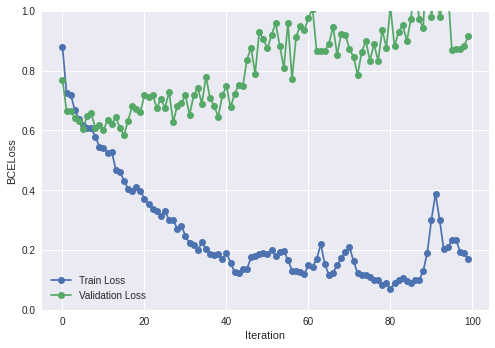

In [16]:
plt.plot(x,y1,'-o', label='Train Loss')
plt.plot(x,y2,'-o', label='Validation Loss')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.savefig(exp_path.joinpath('variables/learning_curve.png'))

In [17]:
train_performances = final_accuracy_t #train_val_losses['train_losses']
val_performances = final_accuracy_v #train_val_losses['val_losses']
train = np.array(train_performances)#[1:])
val = np.array(val_performances)#[1:])
y1,y2,x = train.squeeze()[:steps[-1]+1], val.squeeze()[:steps[-1]+1], steps

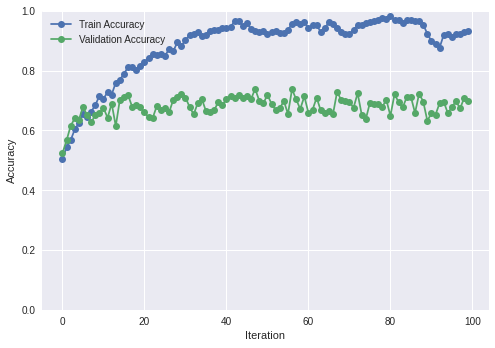

In [18]:
plt.plot(x,y1,'-o', label='Train Accuracy')
plt.plot(x,y2,'-o', label='Validation Accuracy')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.savefig(exp_path.joinpath('variables/learning_curve_accuracy.png'))